In [1]:


import datetime
import numpy as np
import pandas as pd

import pickle
import scipy
import scipy.sparse as sp

#from utils import tf_idf

In [2]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [3]:
INPUT_DATA_FOLDER = "final_data"

ISW_DATA_FILE = "all_isw.csv"
WEATHER_EVENTS_DATA_FILE = "all_hourly_weather_events.csv"

MODEL_FOLDER = "model"

tfidf_transformer_model = "tfidf_transformer"
count_vertorizer_model = "count_vectorizer"
alarm_classifier = "alarm_classifier"

tfidf_transformer_version = "v1"
count_vertorizer_version = "v1"
alarm_classifier_version = "v1"

In [4]:
def isNaN(num):
    return num != num

In [5]:
df_isw = pd.read_csv(f"data/{INPUT_DATA_FOLDER}/{ISW_DATA_FILE}", sep=";")

In [6]:
df_isw.head(5)

,Unnamed: 0,date,title,text_title,text_main,main_html_v8,main_html,main_html1,main_html2,main_html3,main_html4,data_stemmed,data_lemmatized,keywords,report_date,date_tomorrow_datetime
0,1,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\nRussian forces entered major Ukrainian citie...,\nrussian forces entered major ukrainian citie...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forc enter major ukrainian cities—inc...,russian force entered major ukrainian cities—...,"{'february': 0.339, 'kyiv': 0.323, 'pm': 0.295...",2022-02-25,2022-02-26
1,2,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\nRussian forces’ main axes of advance in the ...,\nrussian forces’ main axes of advance in the ...,russian forces’ main axes of advance in the l...,russian forces’ main axes of advance in the l...,russian forces main axes of advance in the la...,russian forces main axes advance last twenty ...,russian forc main axe advanc last twenti four...,russian force main ax advance last twenty fou...,"{'february': 0.409, 'kyiv': 0.367, 'twenty': 0...",2022-02-26,2022-02-27
2,3,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\nThe Russian military has likely recognized t...,\nthe russian military has likely recognized t...,the russian military has likely recognized th...,the russian military has likely recognized th...,the russian military has likely recognized th...,russian military likely recognized initial ex...,russian militari like recogn initi expect lim...,russian military likely recognized initial ex...,"{'february': 0.496, 'seven': 0.349, 'twenty': ...",2022-02-27,2022-02-28
3,4,2022-02-28,"Russian Offensive Campaign Assessment, Februar...","Russian Offensive Campaign Assessment, Februar...","<div class=""field field-name-body field-type-t...",The Russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its mili...,russian military reorganizing military effort...,russian militari reorgan militari effort atte...,russian military reorganizing military effort...,"{'february': 0.553, 'eight': 0.349, 'twenty': ...",2022-02-28,2022-03-01
4,5,2022-03-01,"Russian Offensive Campaign Assessment, March 1...","Russian Offensive Campaign Assessment, March 1","<div class=""field field-name-body field-type-t...",Russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforceme...,russian forces completing reinforcement resup...,russian forc complet reinforc resuppli troop ...,russian force completing reinforcement resupp...,"{'kyiv': 0.359, 'chernihiv': 0.218, 'hour': 0....",2022-03-01,2022-03-02


In [7]:
df_weather_events = pd.read_csv(f"data/{INPUT_DATA_FOLDER}/{WEATHER_EVENTS_DATA_FILE}", sep=";")

In [ ]:
df_weather_events.head(10)

In [153]:
df_weather_events.drop(df_weather_events.loc[(df_weather_events["day_datetime"] == "2022-02-24")].index, inplace=True)

In [154]:
df_weather_events.drop(df_weather_events.loc[(df_weather_events["day_datetime"] == "2022-02-25")].index, inplace=True)

In [155]:
df_weather_events.sample(10).head(10)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch
47508,"Чернівці, Україна",2022-06-13,1655067600,26.6,14.6,20.8,13.5,65.7,0.373,4.17,347.4,30.0,9.0,05:15:06,21:17:50,0.45,06:00:00,1655089200,14.8,93.41,13.8,0.0,0.0,0.0,0.0,NaN,18.1,17.4,318.0,1016.3,44.5,7.8,13.0,0.0,0.0,10.0,Clear,Чернівці,Чернівецька,Чернівці,Chernivtsi,Буковина,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188275,"Вінниця, Україна",2022-04-14,1649883600,15.0,2.8,8.9,-1.1,52.1,0.000,0.00,261.6,22.7,8.0,06:17:06,19:56:57,0.43,17:00:00,1649944800,14.8,29.59,-2.8,0.0,0.0,0.0,0.0,NaN,26.6,11.9,348.3,1020.0,24.1,0.0,482.0,1.7,5.0,10.0,Clear,Вінниця,Вінницька,Вінниця,Vinnytsia,Вінниччина,2,Вінниччина,Вінницька обл.,1.0,2022-04-14 14:04:01,2022-04-14 14:35:17,2022-04-14 14:35:17,NaN,2022-04-14 14:04:01,2022-04-14 14:35:17,2022-04-14 14:00:00,2022-04-14 15:00:00,2022-04-14,1.649945e+09,1.649948e+09,2022-04-14 14:00:00,1.649945e+09
96615,"Хмельницька область, Україна",2023-01-17,1673906400,5.3,1.2,3.3,2.0,88.9,0.100,4.17,37.3,3.3,2.0,08:01:16,16:43:24,0.83,07:00:00,1673931600,1.8,90.52,1.7,0.0,0.0,0.0,0.0,NaN,39.2,26.3,173.0,999.0,24.1,84.5,0.0,NaN,0.0,10.0,Partially cloudy,Хмельницький,Хмельницька,Хмельницький,Khmelnytskyi,Хмельниччина,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15850,"Кропивницький, Україна",2022-12-21,1671573600,2.1,-0.6,0.5,-2.5,80.6,0.100,4.17,21.1,1.9,1.0,07:40:09,15:57:50,0.91,11:00:00,1671613200,0.6,79.13,-2.6,0.0,0.0,0.0,2.1,NaN,19.1,11.2,206.7,1023.0,24.1,78.1,77.0,0.3,1.0,10.0,Partially cloudy,Кропивницький,Кіровоградська,Кропивницький,Kropyvnytskyi,Кіровоградщина,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86777,"Харків, Україна",2022-11-19,1668808800,2.0,-5.0,-1.6,-2.6,92.9,14.900,45.83,2.1,0.1,0.0,06:53:57,15:46:24,0.83,20:00:00,1668880800,1.0,93.03,0.0,0.0,0.0,0.0,2.5,NaN,38.9,18.4,274.8,1011.0,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Харків,Харківська,Харків,Kharkiv,Харківщина,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112503,"Ужгород, Ужгородський район, Україна",2023-01-16,1673820000,5.1,2.2,3.2,2.5,95.3,11.756,16.67,3.3,0.2,0.0,08:17:48,17:03:41,0.80,05:00:00,1673838000,3.5,97.23,3.1,0.0,0.0,0.0,0.4,['snow'],23.6,3.6,20.0,1010.2,3.0,100.0,0.0,NaN,0.0,10.0,Overcast,Ужгород,Закарпатська,Ужгород,Uzhgorod,Закарпаття,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73462,"Миколаїв, Україна",2022-06-27,1656277200,30.0,21.7,25.5,16.2,58.5,0.700,8.33,185.6,16.1,8.0,04:59:03,20:51:06,0.92,05:00:00,1656295200,21.8,75.13,17.2,0.0,0.0,0.0,0.0,NaN,20.5,9.7,1.3,1014.0,24.1,94.8,0.0,NaN,0.0,10.0,Overcast,Миколаїв,Миколаївська,Миколаїв,Mykolaiv,Миколаївщина,14,Миколаївщина,Миколаївська обл.,1.0,2022-06-27 00:38:45,2022-06-27 01:30:18,2022-06-27 01:30:18,NaN,2022-06-27 00:38:45,2022-06-27 01:30:18,2022-06-27 00:00:00,2022-06-27 02:00:00,2022-06-27,1.656288e+09,1.656295e+09,2022-06-27 02:00:00,1.656295e+09
52724,"Чернівці, Україна",2023-01-16,1673820000,1.4,-1.7,-0.3,-0.5,98.9,0.000,0.00,33.9,2.9,2.0,08:01:58,16:50:18,0.80,02:00:00,1673827200,-0.5,94.01,-1.3,0.0,0.0,0.0,0.0,NaN,25.2,4.2,144.0,1012.9,5.9

In [156]:
df_isw_short = df_isw[["report_date", "date_tomorrow_datetime", "keywords", "text_main", "data_lemmatized",]]

In [157]:
df_isw_short = df_isw_short.copy().add_prefix('isw_')


In [158]:
df_isw_short = df_isw_short.drop(index=0)

In [159]:
df_isw_short.head(10)

,isw_report_date,isw_date_tomorrow_datetime,isw_keywords,isw_text_main,isw_data_lemmatized
1,2022-02-26,2022-02-27,"{'february': 0.409, 'kyiv': 0.367, 'twenty': 0...","<div class=""field field-name-body field-type-t...",russian force main ax advance last twenty fou...
2,2022-02-27,2022-02-28,"{'february': 0.496, 'seven': 0.349, 'twenty': ...","<div class=""field field-name-body field-type-t...",russian military likely recognized initial ex...
3,2022-02-28,2022-03-01,"{'february': 0.553, 'eight': 0.349, 'twenty': ...","<div class=""field field-name-body field-type-t...",russian military reorganizing military effort...
4,2022-03-01,2022-03-02,"{'kyiv': 0.359, 'chernihiv': 0.218, 'hour': 0....","<div class=""field field-name-body field-type-t...",russian force completing reinforcement resupp...
5,2022-03-02,2022-03-03,"{'march': 0.563, 'kyiv': 0.392, 'chernihiv': 0...","<div class=""field field-name-body field-type-t...",russian force resumed offensive operation sup...
6,2022-03-03,2022-03-04,"{'march': 0.591, 'eu': 0.179, 'foreign': 0.179...","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...
7,2022-03-04,2022-03-05,"{'march': 0.602, 'nato': 0.162, 'lukashenko': ...","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...
8,2022-03-05,2022-03-06,"{'reservist': 0.395, 'reserve': 0.269, 'conscr...","<div class=""field field-name-body field-type-t...",early announcement spring draft unlikely incr...
9,2022-03-06,2022-03-07,"{'march': 0.546, 'oil': 0.192, 'ceasefire': 0....","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...
10,2022-03-07,2022-03-08,"{'march': 0.344, 'zaporizhya': 0.28, 'kyiv': 0...","<div class=""field field-name-body field-type-t...",russian force concentrating eastern northwest...


In [160]:
# df.dtypes

In [161]:
df = df_weather_events.merge(df_isw_short,
                            how = "left",
                            left_on = "day_datetime", 
                            right_on = "isw_date_tomorrow_datetime")

In [162]:
df.shape

(193980, 64)

In [163]:
# len(df["city_resolvedAddress"].unique())

In [164]:
# df["city_resolvedAddress"].unique()

In [165]:
# df.sample(5).head(5)
# df.loc[df["city_resolvedAddress"] == "Луцьк, Луцький район, Україна"][47:49]

In [166]:
# df.sample(5).head(5)
# df.loc[df["city_resolvedAddress"] == "Кропивницький, Україна"][47:49]

In [167]:
# df.sample(5).head(5)
 #df.loc[df["city_resolvedAddress"] == "Дніпро, Україна"][47:49]

In [168]:

# df.loc[df["isw_date_tomorrow_datetime"] == "2022-02-25"]

In [169]:
df_work = df.assign(is_alarm=lambda x: x['event_day_date'].notnull().astype(int))

In [170]:
df_work.head(5)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,isw_report_date,isw_date_tomorrow_datetime,isw_keywords,isw_text_main,isw_data_lemmatized,is_alarm
0,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,00:00:00,1645826400,0.3,82.07,-2.4,0.0,0.0,0.0,0.0,NaN,14.4,7.9,294.8,1022.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,01:00:00,1645830000,0.1,82.04,-2.6,0.0,0.0,0.0,0.0,NaN,13.7,5.4,289.0,1023.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,02:00:00,1645833600,-0.8,89.99,-2.3,0.0,0.0,0.0,0.0,NaN,12.2,5.7,268.0,1023.6,10.0,90.0,NaN,NaN,NaN,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,03:00:00,1645837200,-0.1,83.24,-2.6,0.0,0.0,0.0,0.0,NaN,8.3,5.0,268.6,1024.0,24.1,63.6,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,04:00:00,1645840800,0.0,83.26,-2.5,0.0,0.0,0.0,0.0,NaN,8.6,5.0,265.8,1024.0,24.1,73.6,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [171]:
df.loc[1, "isw_data_lemmatized"]

nan

In [172]:
df_work.shape

(193980, 65)

<Axes: >

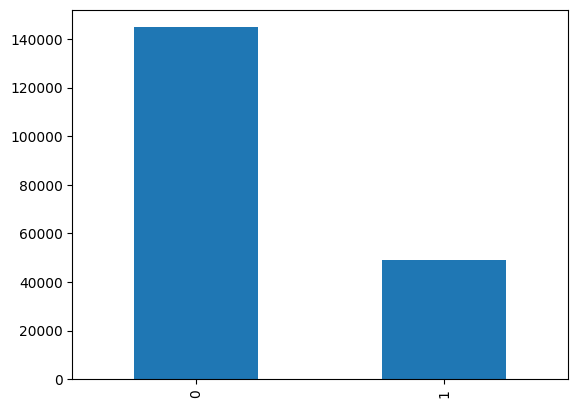

In [173]:
import matplotlib

df_work["is_alarm"].value_counts(dropna=False).plot(kind='bar')

In [174]:
# df_work['isw_data_lemmatized'] = df_work['isw_data_lemmatized'].astype('string')

In [175]:
df_work['day_datetime'] = pd.to_datetime(df_work['day_datetime'])

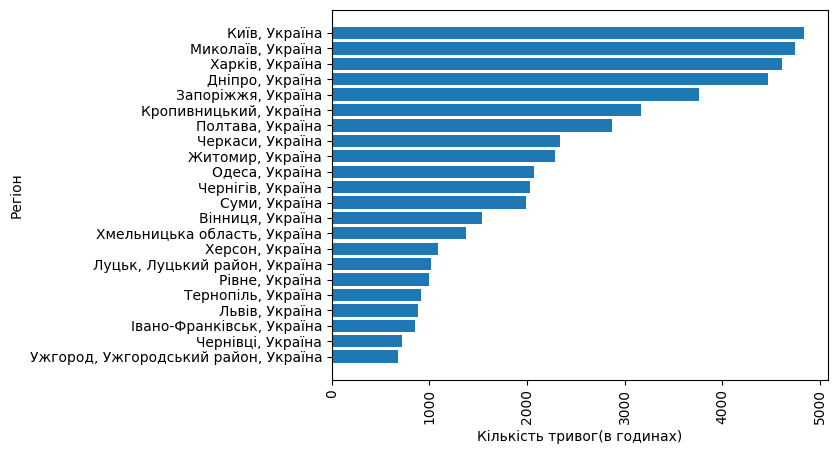

In [176]:
import matplotlib.pyplot as plt

df_filtered = df_work[df_work['is_alarm'] == 1]

result = df_filtered.groupby('city_resolvedAddress').size().sort_values()

plt.barh(result.index, result.values)

plt.ylabel('Регіон')
plt.xlabel('Кількість тривог(в годинах)')

plt.xticks(rotation=90)

plt.show()

In [177]:
df_work.shape

(193980, 65)

In [178]:
# df_quarter = df_work.iloc[::4]

In [179]:
# df_quarter.shape

In [180]:
# df_filtered = df_quarter[df_quarter['is_alarm'] == 1]

# result = df_filtered.groupby('city_resolvedAddress').size().sort_values()

# plt.barh(result.index, result.values)

# plt.ylabel('Регіон')
# plt.xlabel('Кількість тривог(в годинах)')

# plt.xticks(rotation=90)

# plt.show()

In [181]:
# new_dates = pd.date_range(start='2022-02-26', end='2023-01-20', freq='2D')
# new_df = pd.DataFrame({'day_datetime': new_dates})

# df_half = pd.merge(df_work, new_df, on='day_datetime')

In [182]:
# df_half.shape

In [183]:
# df_filtered = df_half[df_half['is_alarm'] == 1]

# result = df_filtered.groupby('city_resolvedAddress').size().sort_values()

# plt.barh(result.index, result.values)

# plt.ylabel('Регіон')
# plt.xlabel('Кількість тривог(в годинах)')

# plt.xticks(rotation=90)

# plt.show()

In [184]:
df_work['day_of_week'] = df_work['day_datetime'].dt.day_name()
#df_half['day_of_week'] = df_half['day_datetime'].dt.day_name()

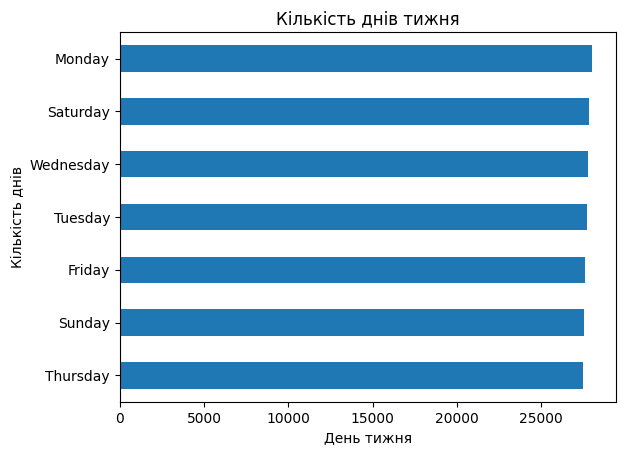

In [185]:
counts = df_work.groupby('day_of_week').size().sort_values()

counts.plot(kind='barh')
plt.xlabel('День тижня')
plt.ylabel('Кiлькiсть днiв')
plt.title('Кількість днiв тижня')
plt.show()

In [186]:
# counts = df_half.groupby('day_of_week').size().sort_values()

# counts.plot(kind='barh')
# plt.xlabel('День тижня')
# plt.ylabel('Кiлькiсть днiв')
# plt.title('Кількість днiв тижня (кожен другий день)')
# plt.show()

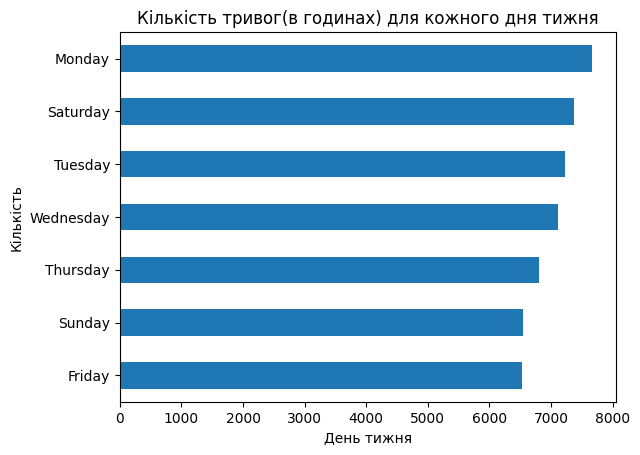

In [187]:
counts = df_work.groupby(['day_of_week', 'is_alarm']).size().unstack().sort_values(by=1, ascending=True)

counts[1].plot(kind='barh')
plt.xlabel('День тижня')
plt.ylabel('Кількість')
plt.title('Кількість тривог(в годинах) для кожного дня тижня')
plt.show()

In [188]:
# counts = df_half.groupby(['day_of_week', 'is_alarm']).size().unstack().sort_values(by=1, ascending=True)

# counts[1].plot(kind='barh')
# plt.xlabel('День тижня')
# plt.ylabel('Кількість')
# plt.title('Кількість тривог(в годинах) для кожного дня тижня (кожен другий день)')
# plt.show()

In [189]:
#df_work['day_datetime'].unique()

In [190]:
row_counts = df_isw_short['isw_report_date'] .value_counts(normalize=False).sort_index()

len(row_counts)

325

In [191]:
dates_to_remove = ['2022-07-11', '2022-11-24', '2022-12-25', '2023-01-01']

mask = ~df_work['day_datetime'].isin(dates_to_remove)

df_work_v1 = df_work[mask]

In [192]:
df_work_v1.shape

(191715, 66)

In [193]:
row_counts = df_work_v1['day_datetime'].value_counts(normalize=False).sort_index()

len(row_counts)

325

In [194]:
df_isw_short['isw_report_date'] = pd.to_datetime(df_isw_short['isw_report_date'])
dates = df_isw_short['isw_report_date'].unique()
dates

diffs = np.diff(dates)

missing_indices = np.where(diffs > np.timedelta64(1, 'D'))[0]

for i in missing_indices:
    start_date = dates[i]
    end_date = dates[i+1]
    num_missing_days = int((end_date - start_date) / np.timedelta64(1, 'D')) - 1
    for j in range(num_missing_days):
        print(start_date + np.timedelta64(j+1, 'D'))

2022-07-11T00:00:00.000000000
2022-11-24T00:00:00.000000000
2022-12-25T00:00:00.000000000
2023-01-01T00:00:00.000000000


In [195]:
work_dates = df_work['day_datetime'].unique()
isw_dates = df_isw_short['isw_report_date'].unique()

missing_dates = np.setdiff1d(work_dates, isw_dates)

for date in missing_dates:
    print(date)

2022-07-11T00:00:00.000000000
2022-11-24T00:00:00.000000000
2022-12-25T00:00:00.000000000
2023-01-01T00:00:00.000000000


In [196]:
row_counts_array = row_counts.values
# len(row_counts_array)
row_counts_array

array([554, 567, 573, 583, 593, 611, 645, 632, 653, 767, 597, 643, 713,
       878, 925, 911, 920, 989, 822, 743, 738, 673, 645, 772, 794, 715,
       673, 703, 731, 585, 718, 688, 663, 595, 601, 587, 605, 616, 577,
       589, 601, 576, 586, 622, 582, 573, 568, 584, 635, 636, 578, 628,
       588, 573, 602, 571, 579, 601, 634, 593, 574, 582, 580, 571, 564,
       581, 600, 587, 595, 634, 596, 650, 578, 570, 560, 568, 590, 572,
       576, 574, 580, 587, 587, 624, 592, 574, 639, 602, 597, 580, 580,
       588, 569, 599, 571, 582, 573, 576, 589, 593, 572, 568, 579, 576,
       556, 561, 567, 580, 587, 568, 574, 570, 575, 585, 565, 575, 594,
       593, 562, 623, 614, 581, 591, 581, 567, 556, 556, 585, 563, 576,
       561, 565, 562, 556, 552, 564, 571, 573, 594, 592, 559, 571, 575,
       562, 556, 565, 600, 571, 570, 578, 571, 629, 568, 575, 563, 574,
       566, 569, 570, 565, 561, 559, 596, 571, 561, 561, 560, 574, 555,
       554, 594, 568, 570, 571, 604, 583, 576, 580, 734, 579, 55

In [197]:
tfidf = pickle.load(open(f"{MODEL_FOLDER}/{tfidf_transformer_model}_{tfidf_transformer_version}.pkl", "rb"))

# import dask.dataframe as dd

# dask_df = dd.from_pandas(df_work, npartitions=10)

cv = pickle.load(open(f"{MODEL_FOLDER}/{count_vertorizer_model}_{count_vertorizer_version}.pkl", "rb"))

In [198]:
# word_count_vector = cv.transform(df_half['isw_data_lemmatized'].values.astype('U'))


In [199]:
# tfidf_vector = tfidf.transform(word_count_vector)

In [200]:
word_count_vector = cv.transform(df_isw_short['isw_data_lemmatized'].values.astype('U'))

In [201]:
tfidf_vector = tfidf.transform(word_count_vector)

In [202]:
#tfidf_vector2 = pickle.load(open(f"{MODEL_FOLDER}/tfidf_vector_calculated.pkl", "rb"))

In [203]:
tfidf_vector

<325x9002 sparse matrix of type '<class 'numpy.float64'>'
	with 216286 stored elements in Compressed Sparse Row format>

In [204]:
tfidf_vector[0].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [205]:
def csr_repeat(csr, repeats):
    if isinstance(repeats, int):
        repeats = np.repeat(repeats, csr.shape[0])
    repeats = np.asarray(repeats)
    rnnz = np.diff(csr.indptr)
    ndata = rnnz.dot(repeats)
    if ndata == 0:
        return sp.csr_matrix((np.sum(repeats), csr.shape[1]),
                                 dtype=csr.dtype)
    indmap = np.ones(ndata, dtype=np.int64)
    indmap[0] = 0
    rnnz_ = np.repeat(rnnz, repeats)
    indptr_ = rnnz_.cumsum()
    mask = indptr_ < ndata
    indmap -= np.int64(np.bincount(indptr_[mask],
                                  weights=rnnz_[mask],
                                  minlength=ndata))
    jumps = (rnnz * repeats).cumsum()
    mask = jumps < ndata
    indmap += np.int64(np.bincount(jumps[mask],
                                  weights=rnnz[mask],
                                  minlength=ndata))
    indmap = indmap.cumsum()
    return sp.csr_matrix((csr.data[indmap],
                              csr.indices[indmap],
                              np.r_[0, indptr_]),
                             shape=(np.sum(repeats), csr.shape[1]))

In [206]:
matrix = scipy.sparse.csr_matrix((0, 9002))
matrix

<0x9002 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [207]:
tfidf_vector

<325x9002 sparse matrix of type '<class 'numpy.float64'>'
	with 216286 stored elements in Compressed Sparse Row format>

In [208]:
# import numpy as np
# from scipy.sparse import vstack

# first_row = tfidf_vector[0]

# new_rows = csr_repeat(first_row, 554)
# new_rows

In [209]:
# matrix = vstack([matrix, new_rows])
# # matrix
# matrix[553].nonzero()

In [210]:
tfidf_vector_all = scipy.sparse.csr_matrix((0, 9002))

Optimized code for calculating the entire tfidf_vector

In [286]:
# for i, count in enumerate(row_counts_array):
#     #print(f"{type(i)} {type(int(count))}")
#     tfidf_vector_all = vstack([tfidf_vector_all, csr_repeat(tfidf_vector[i], int(count))])

# #tfidf_vector_all = vstack([tfidf_vector_all, csr_repeat(tfidf_vector[0], 554)])
    

In [211]:
tfidf_vector_all = pickle.load(open(f"{MODEL_FOLDER}/tfidf_vector_calculated.pkl", "rb"))

In [212]:
tfidf_vector_all

<191715x9002 sparse matrix of type '<class 'numpy.float64'>'
	with 126241829 stored elements in Compressed Sparse Row format>

In [289]:
# with open(f"{MODEL_FOLDER}/tfidf_vector_calculated.pkl", 'wb') as handle:
#     pickle.dump(tfidf_vector_all, handle)

In [213]:
fields_to_exlude = [
    "day_of_week",
    "city_resolvedAddress", 
    "day_datetime",
    "day_datetimeEpoch",
    "hour_datetime",
    "hour_datetimeEpoch",
    "city",
    "region",
    "center_city_ua",
    "center_city_en",
    "event_region_title",
    "event_region_city",
    "event_all_region",
    "event_clean_end",
    "event_intersection_alarm_id",
    "event_start_time",
    "event_end_time",
    "event_start_hour",
    "event_end_hour",
    "event_day_date",
    "event_start_hour_datetimeEpoch",
    "event_end_hour_datetimeEpoch",
    "event_hour_level_event_time",
    "event_hour_level_event_datetimeEpoch",
    "isw_report_date",
    "isw_date_tomorrow_datetime",
    "isw_text_main",
    "isw_keywords",
    "isw_data_lemmatized"
]

In [214]:
df_work_v2 = df_work_v1.drop(fields_to_exlude, axis=1)

In [215]:
df_work_v2.head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,region_alt,region_id,event_start,event_end,is_alarm
0,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,0.3,82.07,-2.4,0.0,0.0,0.0,0.0,NaN,14.4,7.9,294.8,1022.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Волинь,3,NaN,NaN,0
1,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,0.1,82.04,-2.6,0.0,0.0,0.0,0.0,NaN,13.7,5.4,289.0,1023.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Волинь,3,NaN,NaN,0
2,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,-0.8,89.99,-2.3,0.0,0.0,0.0,0.0,NaN,12.2,5.7,268.0,1023.6,10.0,90.0,NaN,NaN,NaN,10.0,Partially cloudy,Волинь,3,NaN,NaN,0
3,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,-0.1,83.24,-2.6,0.0,0.0,0.0,0.0,NaN,8.3,5.0,268.6,1024.0,24.1,63.6,0.0,NaN,0.0,10.0,Partially cloudy,Волинь,3,NaN,NaN,0
4,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,0.0,83.26,-2.5,0.0,0.0,0.0,0.0,NaN,8.6,5.0,265.8,1024.0,24.1,73.6,0.0,NaN,0.0,10.0,Partially cloudy,Волинь,3,NaN,NaN,0


In [79]:
pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [216]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn import preprocessing

In [217]:
REGIONS_DICTIONARY_FILE = f"data/weather_alarms_regions/regions.csv"
df_regions = pd.read_csv(REGIONS_DICTIONARY_FILE)

In [218]:
short_df_regions = df_regions[["region_alt", "region_id"]]
short_df_regions

,region_alt,region_id
0,Крим,1
1,Вінниччина,2
2,Волинь,3
3,Дніпропетровщина,4
4,Донеччина,5
5,Житомирщина,6
6,Закарпаття,7
7,Запоріжжя,8
8,Івано-Франківщина,9
9,Київщина,10


In [219]:
df_work_v2 = df_work_v2.merge(short_df_regions, 
                            how = "left",   
                            left_on = "region_alt", 
                            right_on = "region_alt")

In [220]:
df_work_v2["hour_conditions"] = df_work_v2["hour_conditions"].apply(lambda x: x.split(",")[0])

In [221]:
label_encoder = preprocessing.LabelEncoder()
df_work_v2["hour_conditions_id"] = label_encoder.fit_transform(df_work_v2["hour_conditions"])

In [222]:
with open(f"{MODEL_FOLDER}/weather_conditions_label_encoder.pkl", 'wb') as handle:
    pickle.dump(label_encoder, handle)

In [223]:
df_work_v2.sample(5).head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,region_alt,region_id_x,event_start,event_end,is_alarm,region_id_y,hour_conditions_id
88606,16.9,1.7,9.7,4.1,71.5,0.0,0.00,288.6,24.9,8.0,06:03:09,20:18:25,0.76,2.7,93.12,1.7,0.0,0.0,0.0,0.0,NaN,5.0,2.9,178.0,1011.0,24.1,57.4,26.0,0.1,0.0,10.0,Partially cloudy,Хмельниччина,22,NaN,NaN,0,22,4
169462,18.2,6.7,12.9,0.8,44.5,0.0,0.00,243.5,21.0,8.0,05:20:06,20:17:32,0.20,8.3,51.94,-1.0,0.0,0.0,0.0,0.0,NaN,11.9,6.5,122.0,1027.0,24.1,10.4,0.0,NaN,0.0,10.0,Clear,Черкащина,23,2022-05-06 22:14:48,2022-05-06 22:29:05,1,23,0
32016,25.9,18.6,21.8,15.7,68.8,0.0,0.00,208.3,18.1,7.0,05:52:04,20:10:04,0.71,19.6,77.20,15.5,0.0,0.0,0.0,0.0,NaN,23.8,10.1,26.4,1013.0,24.1,3.7,172.0,0.6,2.0,10.0,Clear,Київщина,10,NaN,NaN,0,10,0
57533,18.4,6.9,11.6,9.2,86.2,0.1,4.17,118.3,10.1,5.0,06:51:51,18:37:39,0.10,13.4,80.96,10.2,0.0,0.0,0.0,0.0,NaN,19.1,9.7,131.2,1009.0,24.1,20.2,9.0,0.0,0.0,10.0,Partially cloudy,Чернігівщина,25,NaN,NaN,0,25,4
33270,10.0,6.4,8.4,6.2,86.1,7.9,8.33,9.3,0.9,0.0,07:02:26,18:30:04,0.27,8.5,83.70,5.9,0.0,0.0,0.0,0.0,['rain'],39.2,16.9,263.1,1009.0,24.1,99.6,19.0,0.1,0.0,10.0,Overcast,Київщина,10,NaN,NaN,0,10,3


In [224]:
tmp_fields_to_exlude = [
    "day_sunrise", 
    "day_sunset", 
    "hour_preciptype",
    "hour_conditions",
    "region_alt",
    "event_start",
    "event_end",
    "hour_solarenergy"
]

In [225]:
df_work_v3 = df_work_v2.drop(tmp_fields_to_exlude, axis=1)

In [233]:
df_work_v3.to_csv(f"data/{INPUT_DATA_FOLDER}/df_work_v3.csv", sep=";", index=False)

In [236]:
df_work_v3.sample(5).head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id_x,is_alarm,region_id_y,hour_conditions_id
190667,-3.4,-5.6,-4.5,-6.3,87.5,0.2,8.33,39.9,3.6,2.0,0.41,-5.0,88.53,-6.6,0.0,0.0,0.0,3.6,40.7,15.5,140.3,1026.0,24.1,100.0,140.0,1.0,10.0,2,0,2,3
28522,11.3,5.1,8.0,5.8,86.4,5.8,8.33,21.2,1.8,1.0,0.70,11.0,74.79,6.7,0.0,0.0,0.0,0.0,34.6,12.2,163.4,1015.0,17.2,95.0,30.0,0.0,10.0,10,1,10,3
33232,12.3,7.2,9.7,6.5,80.9,7.6,8.33,53.5,4.7,4.0,0.24,7.2,91.45,5.9,0.0,0.0,0.0,0.0,49.7,10.8,280.0,1000.9,10.0,100.0,0.0,0.0,10.0,10,0,10,3
164168,18.7,14.4,15.9,9.4,65.7,0.0,0.00,54.6,4.8,2.0,0.15,15.3,66.96,9.2,0.0,0.0,0.0,0.0,18.4,8.6,39.8,1019.0,24.1,99.4,55.0,1.0,10.0,9,0,9,3
104005,16.3,-1.8,7.4,-3.3,52.3,0.0,0.00,267.0,23.1,8.0,0.39,9.4,41.59,-3.0,0.0,0.0,0.0,39.0,7.2,4.6,291.0,1021.7,43.3,52.5,2.0,0.0,10.0,7,0,7,4


In [227]:
y =  df_work_v3["is_alarm"]
df_work_v4 = df_work_v3.drop(["is_alarm"], axis=1).fillna(method="ffill")

In [228]:
df_work_v4.sample(5).head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_moonphase,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id_x,region_id_y,hour_conditions_id
188476,18.7,7.0,13.5,6.2,63.3,0.200,8.33,174.0,15.0,7.0,0.29,17.4,55.87,8.5,0.1,100.0,0.0,0.0,33.8,15.1,327.6,1025.0,24.1,63.8,727.0,7.0,10.0,2,2,5
66073,16.0,10.1,13.6,6.5,62.8,0.000,0.00,50.5,4.4,3.0,0.57,12.4,68.19,6.7,0.0,0.0,0.0,0.0,24.8,7.2,20.0,1025.9,25.0,100.0,48.0,0.0,10.0,15,15,3
122774,23.0,17.6,19.7,15.6,78.5,9.004,8.33,142.3,12.2,6.0,0.94,18.1,92.70,16.9,0.0,0.0,0.0,0.0,22.3,12.2,275.0,1012.0,15.5,100.0,11.0,0.0,10.0,17,17,3
180617,15.6,5.4,10.5,2.7,60.2,0.800,16.67,202.1,17.6,7.0,0.46,13.0,53.21,3.7,0.2,100.0,0.0,0.0,25.6,12.6,122.7,1021.0,24.1,100.0,0.0,0.0,10.0,18,18,5
147588,26.8,18.4,22.0,18.7,82.6,10.000,4.17,276.5,23.8,8.0,0.24,18.4,98.75,18.2,0.0,0.0,0.0,0.0,8.6,3.6,110.0,1013.6,4.0,40.0,11.0,0.0,10.0,16,16,4


In [229]:
type(tfidf_vector_all)

scipy.sparse._csr.csr_matrix

In [230]:
tfidf_vector_all.shape

(191715, 9002)

In [73]:
df_work_v4_csr = scipy.sparse.csr_matrix(df_work_v4.values)
df_all_features = sp.hstack((df_work_v4_csr, tfidf_vector_all), format='csr')

In [74]:
type(df_work_v4_csr)

scipy.sparse._csr.csr_matrix

In [75]:
df_work_v4_csr.shape

(191715, 30)

In [76]:
df_all_features.shape

(191715, 9032)

In [77]:
RANDOM_STATE = 1

X_train, X_test, y_train, y_test = train_test_split(df_all_features, y,
                                                    test_size = 0.20,
                                                    random_state = RANDOM_STATE,
                                                    shuffle=True
)

In [4]:
X_train.shape

NameError: name 'X_train' is not defined

LogisticRegression

In [79]:
clf1 = LogisticRegression(random_state=RANDOM_STATE)
clf1.fit(X_train, y_train)

c:\Users\Danyil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [1]:
predicted = clf1.predict(X_test)
np.mean(predicted == y_test) 

NameError: name 'clf1' is not defined

In [114]:
with open(f"{MODEL_FOLDER}/8_logistic_regression_v3.pkl", 'wb') as handle:
    pickle.dump(clf1, handle)

RandomForestClassifier

In [210]:
clf2 = RandomForestClassifier(random_state=RANDOM_STATE)
clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [211]:
predicted = clf2.predict(X_test)
np.mean(predicted == y_test) 

0.8734703301777881

In [213]:
alarm_classifier = "alarm_classifier"
alarm_classifier_version = "v1"

with open(f"{MODEL_FOLDER}/{alarm_classifier}_{alarm_classifier_version}.pkl", 'wb') as handle:
    pickle.dump(clf2, handle)

Support Vector Machines

In [214]:
from sklearn.svm import SVC

clf3 = SVC(random_state=RANDOM_STATE)
clf3.fit(X_train, y_train)

SVC(random_state=1)

In [215]:
predicted = clf3.predict(X_test)
np.mean(predicted == y_test) 

0.7343184791810975

In [216]:
with open(f"{MODEL_FOLDER}/{alarm_classifier}_v2.pkl", 'wb') as handle:
    pickle.dump(clf3, handle)